## Observations and Insights

## Dependencies and starter code

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combine_data = pd.merge(mouse_metadata,study_results, on ='Mouse ID')
combine_data.head()
#type(combine_data)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [89]:
# create a new DF with only Tumor volume and Drur Regimen as columns

new_df=combine_data[[ 'Drug Regimen','Tumor Volume (mm3)']]
new_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729


## Summary statistics

In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

vol_agg=new_df.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])
vol_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [91]:
counts = combine_data['Drug Regimen'].value_counts()
counts

#type(counts)
#list(counts)

#list(combine_data['Drug Regimen'].unique())
#print(list(combine_data['Drug Regimen'].unique()))
#print(list(counts))
#print(counts)

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

## Bar plots

           Drug Regimen
Capomulin           230
Ramicane            228
Ketapril            188
Naftisol            186
Zoniferol           182
Placebo             181
Stelasyn            181
Ceftamin            178
Infubinol           178
Propriva            161


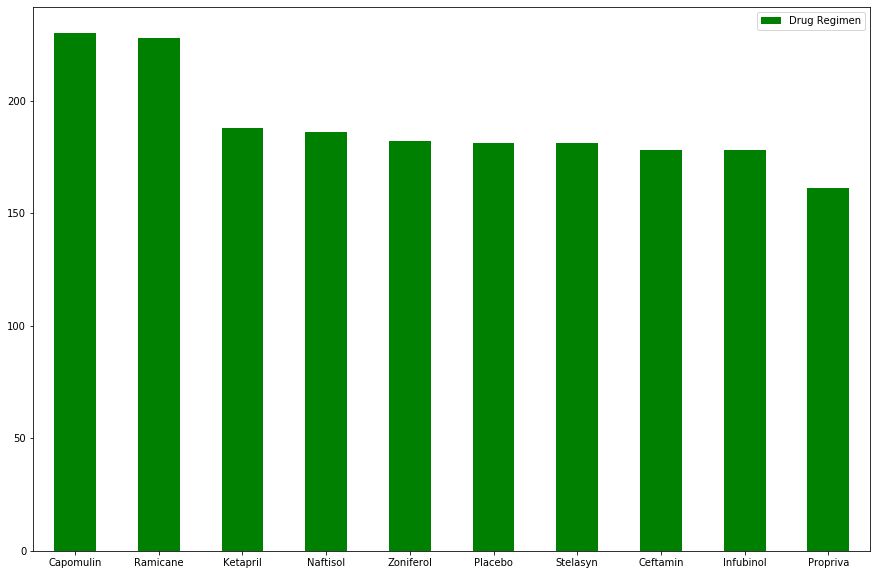

In [92]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
counts = combine_data['Drug Regimen'].value_counts()
sr= counts
counts_df=sr.to_frame()
print(counts_df)

#list(counts)
#list(combine_data['Drug Regimen'].unique())
#df = pd.DataFrame({'Drug Regimen':list(combine_data['Drug Regimen'].unique()), 'counts':list(counts)})
ax = counts_df.plot.bar( rot=0,color='g', alpha=1.0, align="center", figsize=(15,10))
#x='Drug Regimen', y='counts',

#print(sr)
#type(counts_df)


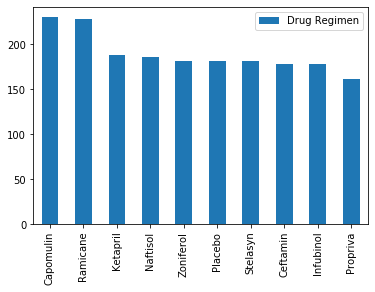

In [93]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
counts_df.plot(kind='bar')


## Pie plots

        Sex
Male    958
Female  935


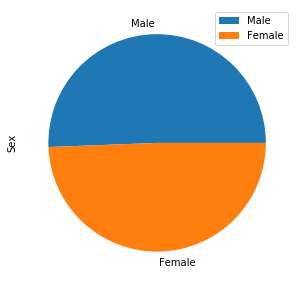

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts_sex = combine_data['Sex'].value_counts()
counts_sex
#type(counts_sex)

sr_counts_sex= counts_sex
counts_sex_df=sr_counts_sex.to_frame()
print(counts_sex_df)

plot = counts_sex_df.plot.pie(subplots=True,figsize=(5, 5))


(-1.1065652022428258,
 1.1003126286782299,
 -1.1101719390349558,
 1.2076939577793158)

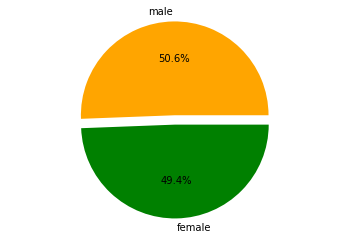

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex = ['male','female']
count = [958,935]
colors = ["orange","green"]
explode = (0.1,0)
plt.pie(count, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%")
plt.axis("equal")

## Quartiles, outliers and boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens..

new_df_tumor_vol=combine_data[[ 'Mouse ID','Drug Regimen','Tumor Volume (mm3)','Timepoint']]
#new_df_tumor_vol

indexNames = new_df_tumor_vol[new_df_tumor_vol['Timepoint']!=45].index

new_df_tumor_vol.drop(indexNames, inplace = True)

#new_df_tumor_vol
indexNames_dg = new_df_tumor_vol[ (new_df_tumor_vol['Drug Regimen']!="Capomulin") & (new_df_tumor_vol['Drug Regimen']!="Ramicane") & (new_df_tumor_vol['Drug Regimen']!= "Infubinol") & (new_df_tumor_vol['Drug Regimen']!="Ceftamin")].index


new_df_tumor_vol.drop(indexNames_dg, inplace = True)
#new_df_tumor_vol["Drug Regimen"].unique()
new_df_tumor_vol.head(10)

TumorVolume=new_df_tumor_vol['Tumor Volume (mm3)']

quartiles = TumorVolume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 33.48002734
The upper quartile is: 62.14221369
The interquartile is: 28.66218635
The the median of temperatures is: 40.1592203 
Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.


In [34]:
new_df_tumor_vol.head(10)

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint
9,k403,Ramicane,22.050126,45
19,s185,Capomulin,23.343598,45
29,x401,Capomulin,28.484033,45
39,m601,Capomulin,28.430964,45
49,g791,Ramicane,29.128472,45
59,s508,Ramicane,30.276232,45
74,m546,Ramicane,30.564625,45
84,z578,Ramicane,30.638696,45
94,j913,Ramicane,31.560470,45
104,u364,Capomulin,31.023923,45


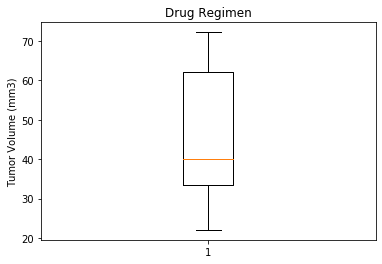

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

TumorVolume=new_df_tumor_vol['Tumor Volume (mm3)']
DrugRegimen=new_df_tumor_vol['Drug Regimen']


fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(TumorVolume)
plt.show()

## Line and scatter plots

In [98]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [99]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [100]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen